In [19]:
from keras.datasets import mnist

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
(trainX,trainy),(testX,testy) = mnist.load_data()

In [ ]:
print(trainX.shape)

(60000, 28, 28)


In [ ]:
print(testX.shape)

(10000, 28, 28)


In [ ]:
print(trainy.shape)

(60000,)


In [ ]:
print(testy.shape)

(10000,)


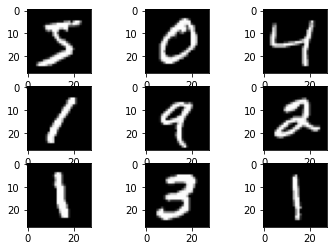

In [ ]:
for i in range(9) : 
  plt.subplot(330+1+i)
  plt.imshow(trainX[i],cmap=plt.get_cmap('gray'))

In [ ]:
history = model.fit(...,validation_data = (valX,valY))

NameError: ignored

In [ ]:
(trainX,trainY),(testX,testY) = mnist.load_data()

#### reshaping the train and test data

trainX = trainX.reshape(trainX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1)

trainX.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

In [ ]:
testX.shape

(10000, 28, 28, 1)

In [87]:
from tensorflow import keras
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD

trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)

In [88]:
def load_dataset() : 
  (trainX,trainY),(testX,testY) = mnist.load_data()

#### reshaping the train and test data

  trainX = trainX.reshape(trainX.shape[0],28,28,1)
  testX = testX.reshape(testX.shape[0],28,28,1)
  trainY = keras.utils.to_categorical(trainY)
  testY = keras.utils.to_categorical(testY)
  return trainX,trainY,testX,testY

In [89]:
### normalizing pixel values
def pixel_norm(train,test) : 
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm = train_norm/255.0
  test_norm = test_norm/255.0
  return train_norm,test_norm

In [90]:
def define_model() : 
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',input_shape = (28,28,1)))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(100,activation = 'relu',kernel_initializer = 'he_uniform'))
  model.add(Dense(10,activation = 'softmax'))
  opt = SGD(lr = 0.01,momentum = 0.9)
  model.compile(optimizer = opt , loss = 'categorical_crossentropy',metrics = ['accuracy'])
  return model

In [91]:
def evaluate_model(dataX,dataY,n_folds = 5) :
  scores,histories = list(),list()
  kfold = KFold(n_folds, shuffle=True,random_state = 1) 
  for train_ix,test_ix in kfold.split(dataX) : 
    model = define_model()
    trainX,trainY,testX,testY = dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
    history = model.fit(trainX,trainY,epochs = 10,batch_size = 32,validation_data = (testX,testY),verbose = 0)
    _,acc = model.evaluate(testX,testY,verbose = 0)
    print('> %.3f' % (acc*100.0))
    scores.append(acc)
    histories.append(history)
  return scores,histories

In [92]:
def summarize_diagnostics(histories) :
  for i in range(len(histories)) :
    plt.subplot(2,1,1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'],color = 'blue',label = 'train')
    plt.plot(histories[i].history['val_loss'],color = 'orange',label = 'test')

    plt.subplot(2,1,2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'],color = 'blue', label='train')
    plt.plot(histories[i].history['val_accuracy'],color = 'orange',label = 'test')
    plt.show()

In [93]:
def summarize_performance(scores) : 
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100,std(scores)*100,len(scores)))
  plt.boxplot(scores)
  plt.show()

In [94]:
def run_test_harness() :
  trainX,trainY,testX,testY = load_dataset()
  trainX,testX = pixel_norm(trainX,testX)
  scores,histories = evaluate_model(trainX,trainY)
  summarize_diagnostics(histories)
  summarize_performance(scores)

> 98.525
> 98.808
> 98.575
> 98.858
> 98.683


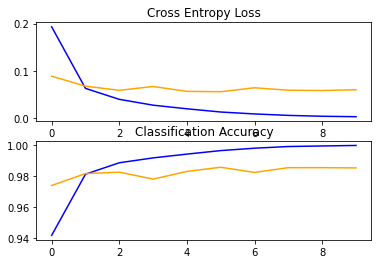

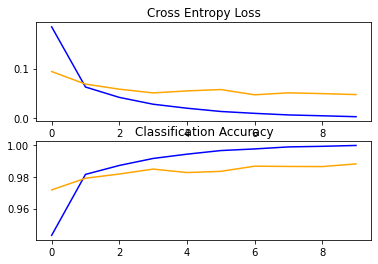

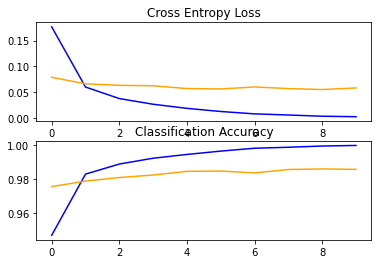

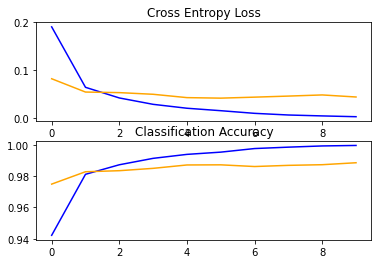

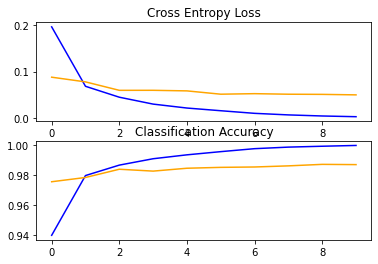

Accuracy: mean=98.690 std=0.129, n=5


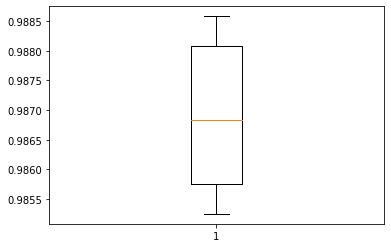

In [95]:
run_test_harness()